# **Improving Campaign Response of Bank Customer by Targeted Marketing**

Author : Anissa Prameswari


---

# Introduction

For this project the objective is to Improve DM Response by targeting the unresponsive customer with specified marketing strategy. With this being said we can use Machine Learning to predict the targeted customer **characteristics** so the bank can offer suitable product and services to boost profitabiity and retain their customer.



# Import Data

Unfortunately, the dataset for this project is exclusive so the detail of the dataset is limited to the analytics that reported below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
import io
import scipy.stats as st
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_tree, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import datetime
import graphviz

In [2]:
#Mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing Data into DataFrame
df = pd.read_csv('drive/My Drive/Colab Notebooks/Data/cp_data_eng_full.csv')

In [4]:
#Data attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NO                       1293 non-null   int64  
 1   Customer_ID              1293 non-null   int64  
 2   Response                 1003 non-null   object 
 3   Sex                      1232 non-null   object 
 4   Age                      1232 non-null   float64
 5   Card_type                1111 non-null   object 
 6   Shopping                 1194 non-null   float64
 7   Cashing                  1194 non-null   float64
 8   ETC                      1194 non-null   float64
 9   Card_contraction         1293 non-null   object 
 10  Card_grade               1104 non-null   object 
 11  Job                      771 non-null    object 
 12  On_the_job               1104 non-null   object 
 13  marriage                 1029 non-null   object 
 14  questionnaire1          

We have 1292 customer in this dataset with 69 features. The target is the 'Response' variable and there are several characteristic we can see ('Sex', 'Age', 'Card_type', 'Job', etc.) that seems more important and several seems redundant to the important feature such as 'On_the_job', so we need to analyze the dataset deeper.


In [5]:
df.head()

,NO,Customer_ID,Response,Sex,Age,Card_type,Shopping,Cashing,ETC,Card_contraction,...,charge_Wednesday,charge_Friday,charge_Thursday,charge_Saturday,charge_Sunday,generation,contraction_year,contraction_mon,contraction_day,contraction_day_JP
0,1,80000018,no reply,F,35.0,original,1.0,0.0,0.0,2003/3/22,...,8410.0,NaN,72300.0,6620.0,16920.0,30s,2003.0,3.0,7.0,Saturday
1,2,80000042,reply,M,39.0,affiliated card A,1.0,1.0,0.0,2003/1/21,...,90880.0,36020.0,NaN,19010.0,69110.0,30s,2003.0,1.0,3.0,Tuesday
2,3,80000234,no reply,F,43.0,affiliated card A,1.0,1.0,1.0,2003/2/16,...,8110.0,NaN,9470.0,NaN,21680.0,40s,2003.0,2.0,1.0,Sunday
3,4,80000273,no reply,F,45.0,original,1.0,1.0,1.0,2003/2/19,...,3860.0,NaN,NaN,NaN,NaN,40s,2003.0,2.0,4.0,Wednesday
4,5,80000529,no reply,M,33.0,affiliated card A,1.0,0.0,0.0,2003/1/12,...,9980.0,NaN,5270.0,13200.0,NaN,30s,2003.0,1.0,1.0,Sunday


## Addressing Missing Value

In [6]:
df.isnull().sum()

NO                      0
Customer_ID             0
Response              290
Sex                    61
Age                    61
                     ... 
generation            207
contraction_year      207
contraction_mon       207
contraction_day       207
contraction_day_JP    207
Length: 69, dtype: int64

This dataset contain so many missing values, for this step we should drop missing value in our target ('Response') fist, then we can decide for the other missing value along with our analysis. 

In [7]:
#Remove the missing response
df.dropna(subset = ['Response'], inplace=True)

## Addressing Duplicate

In [8]:
#Show the duplicate in Customer_ID
df[df.duplicated('Customer_ID')]

,NO,Customer_ID,Response,Sex,Age,Card_type,Shopping,Cashing,ETC,Card_contraction,...,charge_Wednesday,charge_Friday,charge_Thursday,charge_Saturday,charge_Sunday,generation,contraction_year,contraction_mon,contraction_day,contraction_day_JP
1000,1000,80109887,no reply,M,44.0,affiliated card C,0.0,0.0,0.0,2003/3/25,...,NaN,NaN,10430.0,58370.0,35090.0,40s,2003.0,3.0,3.0,Tuesday


In [9]:
#Remove Duplicate
df.drop_duplicates(subset ='Customer_ID', keep = 'first', inplace = True)

## Addressing Different Data Type

Some column that has datetime data need to be converted into an appropriate data type. However, there are some missing value or abnormal data that need to be inspected before converting.

In [10]:
#There is an abnormal date in min_used _date
df[df['min_used_date'] == '41000']

,NO,Customer_ID,Response,Sex,Age,Card_type,Shopping,Cashing,ETC,Card_contraction,...,charge_Wednesday,charge_Friday,charge_Thursday,charge_Saturday,charge_Sunday,generation,contraction_year,contraction_mon,contraction_day,contraction_day_JP
1002,1002,80109889,no reply,M,200.0,original,0.0,1.0,0.0,2003/2/15,...,NaN,NaN,NaN,NaN,74310.0,40s,2003.0,2.0,7.0,Saturday


In [11]:
#Fail to change max_used_date into datetime
#There is an abnormal date in min_used _date
df[df['max_used_date'] == '20NA']

,NO,Customer_ID,Response,Sex,Age,Card_type,Shopping,Cashing,ETC,Card_contraction,...,charge_Wednesday,charge_Friday,charge_Thursday,charge_Saturday,charge_Sunday,generation,contraction_year,contraction_mon,contraction_day,contraction_day_JP
57,58,80005291,no reply,M,32.0,affiliated card C,1.0,0.0,0.0,2003/2/3,...,4540.0,82600.0,NaN,82570.0,30610.0,30s,2003.0,2.0,2.0,Monday


Since there's only two column we can remove them.

In [12]:
#Removing abnormal date
df = df.loc[df['min_used_date'] != '41000']
df= df[df['max_used_date'] != '20NA']

In [13]:
#Datetime conversion
df[['Card_contraction', 'min_used_date', 'max_used_date', 'expiration_date']] = df[['Card_contraction', 'min_used_date', 'max_used_date', 'expiration_date']].apply(pd.to_datetime)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1001
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   NO                       1000 non-null   int64         
 1   Customer_ID              1000 non-null   int64         
 2   Response                 1000 non-null   object        
 3   Sex                      1000 non-null   object        
 4   Age                      1000 non-null   float64       
 5   Card_type                1000 non-null   object        
 6   Shopping                 1000 non-null   float64       
 7   Cashing                  1000 non-null   float64       
 8   ETC                      1000 non-null   float64       
 9   Card_contraction         1000 non-null   datetime64[ns]
 10  Card_grade               1000 non-null   object        
 11  Job                      706 non-null    object        
 12  On_the_job               1000 non-

Now we can do the analysis since all of the data already has correct data type and grouping them in our analysis can simplify our work.

In [15]:
#Group the Data
df_datetime = ['min_used_date', 'max_used_date', 'Card_contraction', 'expiration_date']
df_numeric = ['Age', 'onlineservice_avg_mon', 'cashing_avg_mon', 'food_avg_mon', 'speciality_avg_mon', 'general_avg_mon', 'network_avg_mon', 'onlineshopping_avg_mon', 'beauty_avg_mon', 'amusement_avg_mon', 'travel_avg_mon', 'onlineservice_avg_lmon', 'cashing_avg_lmon', 'food_avg_mon.1', 'speciality_avg_lmon', 'general_avg_lmon', 'network_avg_lmon', 'onlineshopping_avg_lmon', 'beauty_avg_lmon', 'amusement_avg_lmon', 'travel_avg_lmon', 'shopping_avg', 'cashing_avg', 'ETC_avg', 'shopping_rec', 'cashing_rec', 'ETC_rec', 'max_charge', 'min_charge', 'avg_charge', 'charge_avg_per_mon', 'charge_lmon','charge_Monday','charge_Tuesday','charge_Wednesday','charge_Thursday','charge_Friday','charge_Saturday','charge_Sunday']
df_category = ['Response', 'Sex', 'Card_type', 'Shopping', 'Cashing', 'ETC', 'Card_grade', 'Job', 'On_the_job', 'marriage', 'questionnaire1', 'questionnaire2', 'questionnaire3', 'questionnaire4', 'questionnaire5', 'generation', 'contraction_year', 'contraction_day', 'contraction_mon', 'contraction_day_JP', 'No_function', 'No_member_store_use', 'No_category_use', 'No_records']

# Univariate Analysis

## Analysis for Numerical Values

### Missing value

In [16]:
#Percentage of missing value in every column
(df[df_numeric].isnull().sum()/len(df[df_numeric]))*100

Age                         0.0
onlineservice_avg_mon      73.4
cashing_avg_mon            20.1
food_avg_mon               76.1
speciality_avg_mon         29.3
general_avg_mon            61.6
network_avg_mon            79.5
onlineshopping_avg_mon     91.3
beauty_avg_mon             89.9
amusement_avg_mon          90.1
travel_avg_mon             41.2
onlineservice_avg_lmon     73.4
cashing_avg_lmon           20.1
food_avg_mon.1             76.1
speciality_avg_lmon        29.3
general_avg_lmon           61.6
network_avg_lmon           79.5
onlineshopping_avg_lmon    91.3
beauty_avg_lmon            89.9
amusement_avg_lmon         90.1
travel_avg_lmon            41.2
shopping_avg                8.1
cashing_avg                20.0
ETC_avg                    46.5
shopping_rec                8.1
cashing_rec                20.0
ETC_rec                    46.5
max_charge                  0.0
min_charge                  0.0
avg_charge                  0.0
charge_avg_per_mon          0.0
charge_l

From the percentage of the missing value we can see a pattern that average and recent feature for same method or category of spending will have the same percentage of missing value. For example 'onlineservice_avg_mon' and 'onlineservice_avg_lmon'.

Since this dataset is relatively small dropping all the missing values would resulted in a poor model. There are also so many features in this dataset, this will make the data more sparse and might lead to overfitting. However, to select the feature we want for modeling, we might also want to see any relationship between the data such as 'No_function' with functions ('ETC', 'Shopping', 'Cashing') or 'No_category_use' with categories. 

Hence, this project approach the method to drop features with missing values more than or equal to 30%.

In [17]:
#Dropping feature that has missing value more than ~30%
df = df.drop(['onlineservice_avg_mon', 'food_avg_mon', 'general_avg_mon', 'network_avg_mon', 'onlineshopping_avg_mon', 'beauty_avg_mon', 'travel_avg_mon', 'amusement_avg_mon', 'onlineservice_avg_lmon', 'food_avg_mon.1', 'general_avg_lmon', 'network_avg_lmon', 'onlineshopping_avg_lmon', 'beauty_avg_lmon', 'speciality_avg_mon', 'speciality_avg_lmon', 'amusement_avg_lmon', 'travel_avg_lmon', 'ETC_avg', 'ETC_rec', 'charge_Monday', 'charge_Tuesday', 'charge_Wednesday', 'charge_Thursday', 'charge_Friday', 'charge_Saturday', 'charge_Sunday'], axis = 1)
df_numeric = ['Age', 'cashing_avg_mon', 'cashing_avg_lmon',  'shopping_avg', 'cashing_avg', 'shopping_rec', 'cashing_rec', 'max_charge', 'min_charge', 'avg_charge', 'charge_avg_per_mon', 'charge_lmon']

### Statistical Analysis

In [18]:
df[df_numeric].describe()

,Age,cashing_avg_mon,cashing_avg_lmon,shopping_avg,cashing_avg,shopping_rec,cashing_rec,max_charge,min_charge,avg_charge,charge_avg_per_mon,charge_lmon
count,1000.000000,799.000000,799.000000,919.000000,800.000000,919.000000,800.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.353000,25650.326658,25965.957447,25828.343993,25628.083413,24861.610446,25943.225000,55953.450000,6429.140000,23878.395000,26314.356000,26046.240000
std,11.615046,26498.516510,32248.156518,22853.193574,26489.485084,30238.621869,32234.383097,51485.870684,7440.241034,18233.165558,20595.105894,33481.845795
min,14.000000,2030.000000,2020.000000,2040.000000,2030.000000,2010.000000,2020.000000,2110.000000,2000.000000,2110.000000,2110.000000,2000.000000
25%,28.000000,8442.500000,6055.000000,9485.000000,8382.500000,6010.000000,6062.500000,16375.000000,2770.000000,9827.000000,10277.000000,5927.500000
50%,35.000000,18300.000000,15360.000000,19965.000000,18280.850000,14180.000000,15335.000000,40265.000000,4125.000000,19804.500000,21521.000000,14370.000000
75%,42.000000,33093.000000,32890.000000,33826.450000,33076.675000,32150.000000,32880.000000,75842.500000,7062.500000,32098.250000,35330.500000,32517.500000
max,200.000000,268490.000000,268490.000000,210800.000000,268490.000000,308330.000000,268490.000000,363860.000000,93320.000000,110525.000000,122530.000000,363860.000000


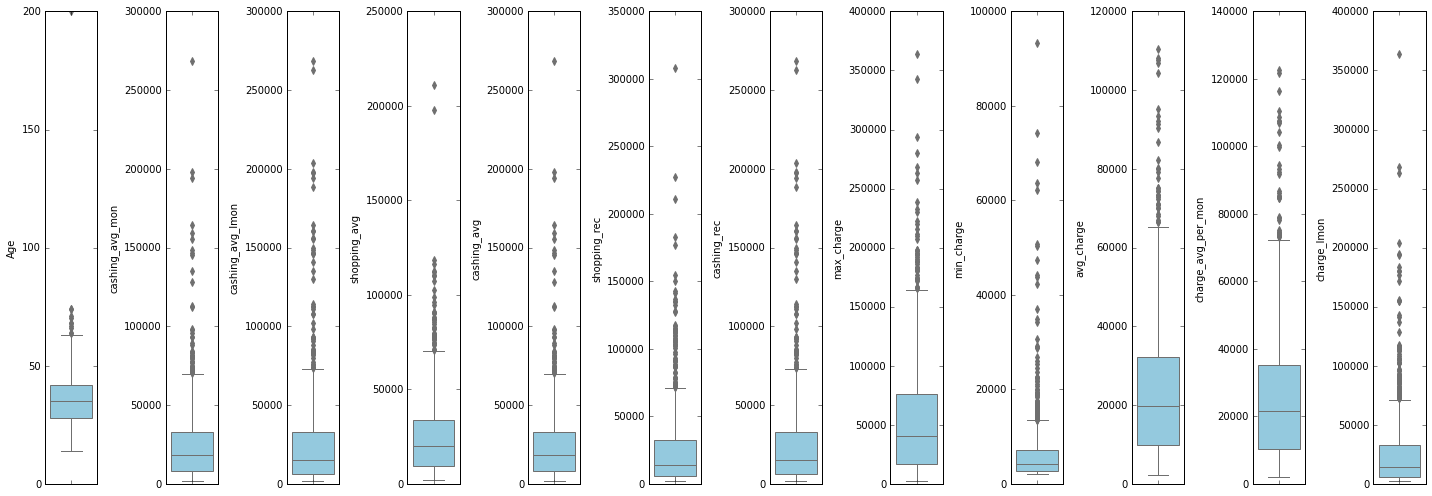

In [19]:
#Check outliers by boxplot
plt.figure(figsize=(20,7))
for i in range(0,len(df_numeric)):
  plt.subplot(1, len(df_numeric), i+1)
  sns.boxplot(y = df[df_numeric[i]], color = 'skyblue')
  plt.tight_layout()

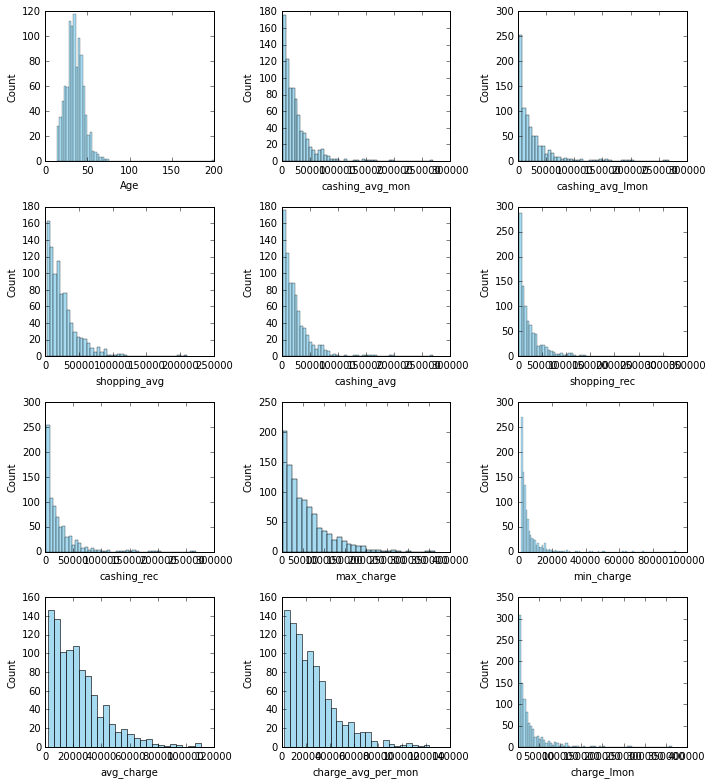

In [20]:
#Column Distribution using histogram
plt.figure(figsize=(10,11))
for i in range(0, len(df_numeric)):
  plt.subplot(4, 3, i+1)
  sns.histplot(x=df[df_numeric[i]], color = 'skyblue')
  plt.xlabel(df_numeric[i])
  plt.tight_layout()

Observation of numerical values:

*   'Age' has an outlier of 200 which is non-sensical, while other columns outlier still sensical since it's based on customer spending
*   Almost all of the column is right skewed.
*   Check if features that have a look-alike distribution is redundant such as:
1. 'avg_charge' and 'charge_avg_per_mon'; 'cashing_avg' and 'cashing_avg_mon'; 'cashing_rec' and 'cashing_avg_lmon'
2. Average of spending method and recent spending method

In [21]:
#Remove abnormal 'Age'
df = df.loc[df['Age'] != 200]

Since, the age outlier is abnormal we decided to drop the value. While, we should check other observation in bivariate analysis and drop the unimportant features.

## Analysis for Categorical Values

### Missing values for categorical features

In [22]:
df[df_category].isnull().sum()/len(df[df_category])*100

Response                0.000000
Sex                     0.000000
Card_type               0.000000
Shopping                0.000000
Cashing                 0.000000
ETC                     0.000000
Card_grade              0.000000
Job                    29.429429
On_the_job              0.000000
marriage                0.000000
questionnaire1          0.000000
questionnaire2          0.000000
questionnaire3          0.000000
questionnaire4          0.000000
questionnaire5          0.000000
generation              0.000000
contraction_year        0.000000
contraction_day         0.000000
contraction_mon         0.000000
contraction_day_JP      0.000000
No_function             0.000000
No_member_store_use     0.000000
No_category_use         0.000000
No_records              0.000000
dtype: float64

There are 29.42% missing values in Job, we can assume this is people whose Job is unknown so instead of dropping them we can fill the missing values with Unknown.

In [23]:
df['Job'] = df['Job'].fillna('Unknown')

### Statistical Analysis for categorical features

In [24]:
df[df_category].astype('category').describe()

,Response,Sex,Card_type,Shopping,Cashing,ETC,Card_grade,Job,On_the_job,marriage,...,questionnaire5,generation,contraction_year,contraction_day,contraction_mon,contraction_day_JP,No_function,No_member_store_use,No_category_use,No_records
count,999,999,999,999.0,999.0,999.0,999,999,999,999,...,999.0,999,999.0,999.0,999.0,999,999.0,999.0,999.0,999.0
unique,2,2,4,2.0,2.0,2.0,8,10,2,2,...,6.0,7,1.0,7.0,4.0,7,4.0,12.0,8.0,20.0
top,no reply,F,original,1.0,1.0,0.0,silver card,Unknown,working,unmarried,...,0.0,30s,2003.0,7.0,3.0,Saturday,2.0,3.0,3.0,3.0
freq,839,578,396,748.0,551.0,721.0,345,294,583,556,...,914.0,385,999.0,159.0,329.0,159,466.0,222.0,302.0,180.0


In [25]:
#Value counts
for col in df_category:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: Response
no reply    839
reply       160
Name: Response, dtype: int64


Column: Sex
F    578
M    421
Name: Sex, dtype: int64


Column: Card_type
original             396
affiliated card A    263
affiliated card B    201
affiliated card C    139
Name: Card_type, dtype: int64


Column: Shopping
1.0    748
0.0    251
Name: Shopping, dtype: int64


Column: Cashing
1.0    551
0.0    448
Name: Cashing, dtype: int64


Column: ETC
0.0    721
1.0    278
Name: ETC, dtype: int64


Column: Card_grade
silver card              345
gold card                198
silver card (classic)    158
gold card(superior)       82
platinum loyal card       70
loyal(platinum)card       70
loyal card                45
platinum card             31
Name: Card_grade, dtype: int64


Column: Job
Unknown                294
part time job          164
student                122
general payer3         104
general payer1          82
general payer2          69
sole proprietorship     64
doctor                  36
lawy

Observation:

*   Target is imbalance
*   'Card_grade' has several similar value that we convert into one
*   General payer 1,2,3 in 'Job' give same information
*   'contraction_year' only generate a single value
*   'On_the_job' and 'Job', 'Generation' and 'Age', 'contraction_day' and 'contraction_day_JP' check the correlation and if one of them redundant to decide which one should we drop
*   Correlation on 'No_function' with: 'No_member_store_use', 'No_category_use', and 'No_records'
*   'questionnaire1-5' seems like only filled with customer who gave response to the DM



In [26]:
#Change general payer 1,2,3 into general in 'Job'
df['Job'] = df['Job'].replace(['general payer1','general payer2', 'general payer3'], 'general payer')

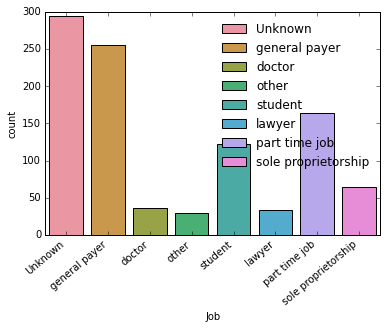

<Figure size 1080x360 with 0 Axes>

In [27]:
#Final job category
ax = sns.countplot(x="Job", hue = "Job", data=df, dodge = False)
plt.figure(figsize =(15,5))
ax.legend(frameon = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [28]:
#Sort similar grade of cards into same grade
df['Card_grade'] = df['Card_grade'].replace('gold card(superior)', 'gold card')
df['Card_grade'] = df['Card_grade'].replace(['loyal(platinum)card', 'platinum loyal card', 'loyal card'], 'platinum card')
df['Card_grade'] = df['Card_grade'].replace('silver card (classic)', 'silver card')

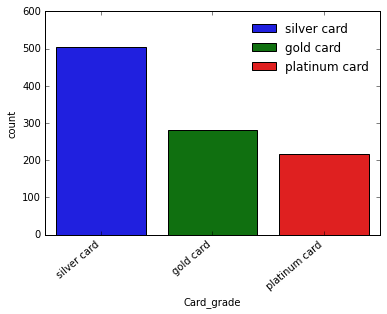

<Figure size 1080x360 with 0 Axes>

In [29]:
#Final Card_Grade Category
ax = sns.countplot(x="Card_grade", hue = 'Card_grade', data=df, dodge = False)
plt.figure(figsize =(15,5))
ax.legend(frameon = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

### Missing value for datetime features

In [30]:
df[df_datetime].isnull().sum()/len(df[df_category])*100

min_used_date       0.0
max_used_date       0.0
Card_contraction    0.0
expiration_date     0.0
dtype: float64

### Statistical value for datetime features

In [31]:
#Stats for datetime values
df[df_datetime].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,min_used_date,max_used_date,Card_contraction,expiration_date
count,999,999,999,999
unique,34,33,101,5
top,2010-04-01 00:00:00,2012-11-01 00:00:00,2003-04-09 00:00:00,2019-03-16 00:00:00
freq,112,157,19,325
first,2010-01-01 00:00:00,2010-04-01 00:00:00,2003-01-01 00:00:00,2019-01-16 00:00:00
last,2012-10-01 00:00:00,2012-12-01 00:00:00,2003-04-11 00:00:00,2019-12-15 00:00:00


Observation:
1. max_used_date and min_used_date can be change into a single variable such as length_of_use
2. Card_contraction information is only for 3 months from 2003
3. Expiration_date information is only from 2019

In [32]:
#Length_of_use to reduce features
df['length_of_use'] = df['max_used_date'] - df['min_used_date']
df['length_of_use'] = pd.to_numeric(df['length_of_use'])
#Convert from ns to days for better understanding in insight
df['length_of_use'] = df['length_of_use']/10**9/3600/24

In [33]:
#Check if there is customer that use card less than a day
df.loc[df['length_of_use'] == 0]

#Output: there are 52 of them

,NO,Customer_ID,Response,Sex,Age,Card_type,Shopping,Cashing,ETC,Card_contraction,...,min_charge,avg_charge,charge_avg_per_mon,charge_lmon,generation,contraction_year,contraction_mon,contraction_day,contraction_day_JP,length_of_use
3,4,80000273,no reply,F,45.0,original,1.0,1.0,1.0,2003-02-19,...,3860.0,3860.0,3860.0,3860.0,40s,2003.0,2.0,4.0,Wednesday,0.0
9,10,80000985,no reply,M,50.0,original,1.0,0.0,0.0,2003-03-24,...,63710.0,63710.0,63710.0,63710.0,50s,2003.0,3.0,2.0,Monday,0.0
17,18,80001920,no reply,M,22.0,affiliated card A,0.0,0.0,0.0,2003-01-27,...,2660.0,2660.0,2660.0,2660.0,20s,2003.0,1.0,2.0,Monday,0.0
58,59,80005465,no reply,F,25.0,original,1.0,1.0,1.0,2003-03-10,...,5500.0,5500.0,5500.0,5500.0,20s,2003.0,3.0,2.0,Monday,0.0
61,62,80005743,no reply,F,34.0,affiliated card C,1.0,0.0,0.0,2003-01-03,...,7070.0,7070.0,7070.0,7070.0,30s,2003.0,1.0,6.0,Friday,0.0
100,101,80010158,no reply,F,48.0,affiliated card B,1.0,0.0,1.0,2003-01-09,...,12320.0,12320.0,12320.0,12320.0,40s,2003.0,1.0,5.0,Thursday,0.0
111,112,80011191,no reply,M,28.0,original,1.0,1.0,0.0,2003-03-24,...,2680.0,2680.0,2680.0,2680.0,20s,2003.0,3.0,2.0,Monday,0.0
164,165,80017080,no reply,F,30.0,affiliated card A,1.0,1.0,0.0,2003-03-25,...,21730.0,21730.0,21730.0,21730.0,30s,2003.0,3.0,3.0,Tuesday,0.0
167,168,80017213,no reply,M,30.0,affiliated card A,1.0,0.0,1.0,2003-03-30,...,8780.0,8780.0,8780.0,8780.0,30s,2003.0,3.0,1.0,Sunday,0.0
168,169,80017278,no reply,F,50.0,affiliated card A,1.0,1.0,0.0,2003-04-10,...,4620.0,4620.0,4620.0,4620.0,50s,2003.0,4.0,5.0,Thursday,0.0


Don't drop them since there's a possibility it's a new customer or ETC only card.

In [34]:
df = df.drop(['min_used_date', 'max_used_date'], axis =1)

In [35]:
df_numeric = ['Age', 'cashing_avg_mon', 'cashing_avg_lmon', 'shopping_avg', 'cashing_avg', 'shopping_rec', 'cashing_rec', 'max_charge', 'min_charge', 'avg_charge', 'charge_avg_per_mon', 'charge_lmon', 'length_of_use']

## Statistical Analysis of Transformed data

In [36]:
df[df_numeric].describe()

,Age,cashing_avg_mon,cashing_avg_lmon,shopping_avg,cashing_avg,shopping_rec,cashing_rec,max_charge,min_charge,avg_charge,charge_avg_per_mon,charge_lmon,length_of_use
count,999.000000,798.000000,798.000000,918.000000,799.000000,918.000000,799.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,35.188188,25580.870927,25797.493734,25784.297527,25558.685895,24867.102397,25774.943680,55848.898899,6423.053053,23845.176176,26265.998999,25891.911912,647.042042
std,10.385294,26442.259819,31914.641346,22826.587759,26433.208164,30254.646593,31901.007137,51405.341178,7441.476112,18211.997278,20548.543806,33140.854768,269.148439
min,14.000000,2030.000000,2020.000000,2040.000000,2030.000000,2010.000000,2020.000000,2110.000000,2000.000000,2110.000000,2110.000000,2000.000000,0.000000
25%,28.000000,8426.250000,6047.500000,9470.000000,8355.000000,6005.000000,6055.000000,16370.000000,2770.000000,9819.000000,10274.000000,5915.000000,488.000000
50%,35.000000,18280.500000,15335.000000,19933.000000,18261.700000,14170.000000,15310.000000,40240.000000,4120.000000,19778.000000,21466.000000,14330.000000,731.000000
75%,42.000000,33060.000000,32857.500000,33687.000000,33060.000000,32155.000000,32845.000000,75830.000000,7055.000000,32060.000000,35228.500000,32510.000000,853.000000
max,74.000000,268490.000000,268490.000000,210800.000000,268490.000000,308330.000000,268490.000000,363860.000000,93320.000000,110525.000000,122530.000000,363860.000000,1035.000000


In [37]:
df[df_category].astype('category').describe()

,Response,Sex,Card_type,Shopping,Cashing,ETC,Card_grade,Job,On_the_job,marriage,...,questionnaire5,generation,contraction_year,contraction_day,contraction_mon,contraction_day_JP,No_function,No_member_store_use,No_category_use,No_records
count,999,999,999,999.0,999.0,999.0,999,999,999,999,...,999.0,999,999.0,999.0,999.0,999,999.0,999.0,999.0,999.0
unique,2,2,4,2.0,2.0,2.0,3,8,2,2,...,6.0,7,1.0,7.0,4.0,7,4.0,12.0,8.0,20.0
top,no reply,F,original,1.0,1.0,0.0,silver card,Unknown,working,unmarried,...,0.0,30s,2003.0,7.0,3.0,Saturday,2.0,3.0,3.0,3.0
freq,839,578,396,748.0,551.0,721.0,503,294,583,556,...,914.0,385,999.0,159.0,329.0,159,466.0,222.0,302.0,180.0


In [38]:
df_datetime = ['Card_contraction', 'expiration_date']
df[df_datetime].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Card_contraction,expiration_date
count,999,999
unique,101,5
top,2003-04-09 00:00:00,2019-03-16 00:00:00
freq,19,325
first,2003-01-01 00:00:00,2019-01-16 00:00:00
last,2003-04-11 00:00:00,2019-12-15 00:00:00


Seems like contraction_day, contraction_year, contraction_month is composite variable from Card_contraction, check in multivaariate analysis.

# Multivariate Analysis

For multivariate analysis to drop redundant feature we need to neglect dropping very high and very low correlated features, as long as the correlation does not equal to 0 or 1. This is because our business objective in addressing the response problem is by ***generating a specified DM marketing strategy*** for the retail tailoring to characteristics of non-responsive class from our model.

## Relationship between numeric variable with numeric variable

In [39]:
def scatter(x,y):
  plt.scatter(df[x],df[y], edgecolors=['skyblue','red'])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

In [40]:
def correlation(x,y):
  print(df[[x,y]].corr())
  print('\n')

1. avg_charge with avg_charge_per_mon

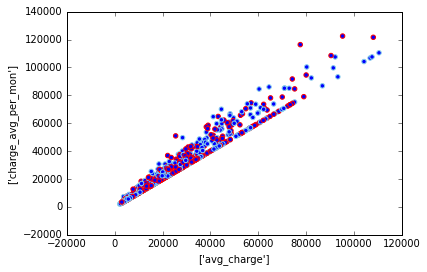

In [41]:
scatter(['avg_charge'],['charge_avg_per_mon'])

In [42]:
correlation('avg_charge','charge_avg_per_mon')

                    avg_charge  charge_avg_per_mon
avg_charge            1.000000            0.980227
charge_avg_per_mon    0.980227            1.000000




Both feature has very strong correlation, but not equal to 1.

2. Correlation between each spending method category and their recent record

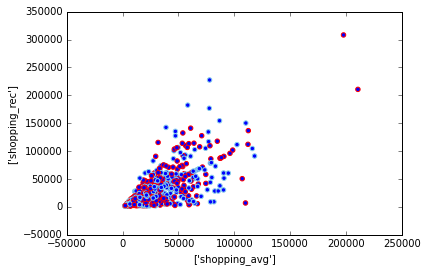

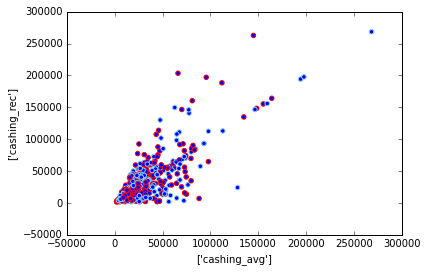

In [43]:
scatter(['shopping_avg'],['shopping_rec'])
scatter(['cashing_avg'],['cashing_rec'])

In [44]:
correlation('shopping_avg','shopping_rec')
correlation('cashing_avg','cashing_rec')

              shopping_avg  shopping_rec
shopping_avg      1.000000      0.739679
shopping_rec      0.739679      1.000000


             cashing_avg  cashing_rec
cashing_avg     1.000000     0.830853
cashing_rec     0.830853     1.000000




3. Correlation between cashing_avg and cashing_avg_mon

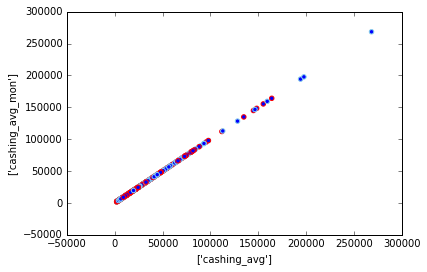

In [45]:
scatter(['cashing_avg'],['cashing_avg_mon'])

In [46]:
correlation('cashing_avg','cashing_avg_mon')

                 cashing_avg  cashing_avg_mon
cashing_avg              1.0              1.0
cashing_avg_mon          1.0              1.0




4. Correlation between 'cashing_rec' and 'cashing_avg_lmon'

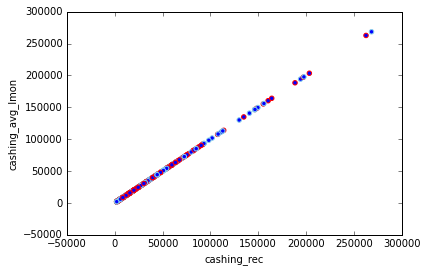

In [47]:
scatter('cashing_rec', 'cashing_avg_lmon')

In [48]:
correlation('cashing_rec', 'cashing_avg_lmon')

                  cashing_rec  cashing_avg_lmon
cashing_rec               1.0               1.0
cashing_avg_lmon          1.0               1.0




In [49]:
#Drop redundant features
df = df.drop(['cashing_avg_lmon','cashing_avg_mon'], axis = 1)

5. Heatmap correlation of numerical features and with target

In [59]:
df['Response_encode'] = df['Response'].replace({ 'reply' : 1, 'no reply' : 0})

In [63]:
df_numeric = ['Age', 'shopping_avg', 'cashing_avg', 'shopping_rec', 'cashing_rec', 'max_charge', 'min_charge', 'avg_charge', 'charge_avg_per_mon', 'charge_lmon', 'length_of_use', 'Response_encode']

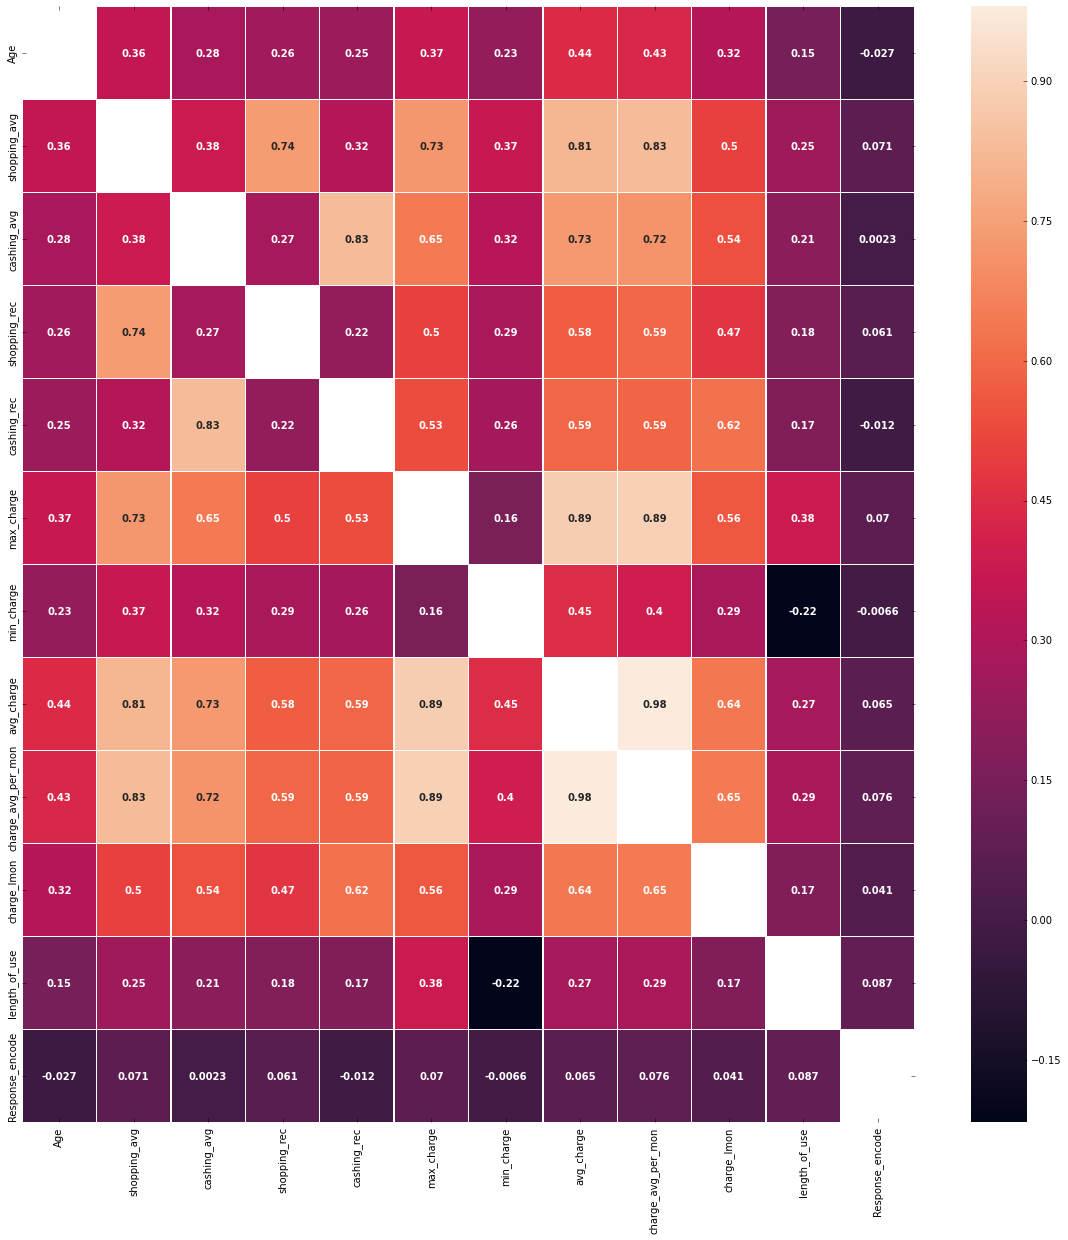

In [64]:
df_corr = df[df_numeric]
df_corr = df_corr.corr()
max_column_u = np.max(df_corr)
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(df_corr, mask = df_corr == max_column_u, annot=True, linewidth = .5, ax=ax,
            annot_kws={"weight" : "bold"}, xticklabels="auto", yticklabels="auto")

Seems there are no more redundant feature for numerical values. We can also see here that the correlation of numerical features towards our target is very low.

## Relationship between category to category variable

In [65]:
def crosstab(x,y):
  crosstab = pd.crosstab(x,y)
  chi_square = st.chi2_contingency(crosstab)

  print(crosstab)
  print('\n')
  print(f'Chi-square =\n {chi_square}')

1. Chi-square of Job and On_the_Job

---

p-value = 0, dof = 7, rejecting null-hypothesis

In [66]:
crosstab(df['Job'],df['On_the_job'])

On_the_job           not working  working
Job                                      
Unknown                      294        0
doctor                         0       36
general payer                  0      255
lawyer                         0       34
other                          0       30
part time job                  0      164
sole proprietorship            0       64
student                      122        0


Chi-square =
 (999.0, 1.980813276852696e-211, 7, array([[122.42642643, 171.57357357],
       [ 14.99099099,  21.00900901],
       [106.18618619, 148.81381381],
       [ 14.15815816,  19.84184184],
       [ 12.49249249,  17.50750751],
       [ 68.29229229,  95.70770771],
       [ 26.65065065,  37.34934935],
       [ 50.8028028 ,  71.1971972 ]]))


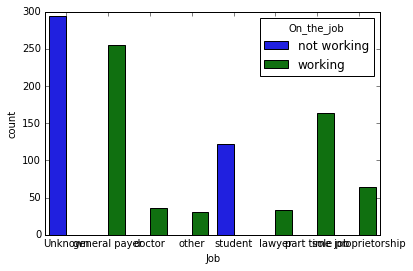

In [67]:
sns.countplot(x = 'Job', hue = 'On_the_job', data = df)
#Redundant drop one of them

In [68]:
df = df.drop(['On_the_job'], axis =1)

2. Questionnaire and Response

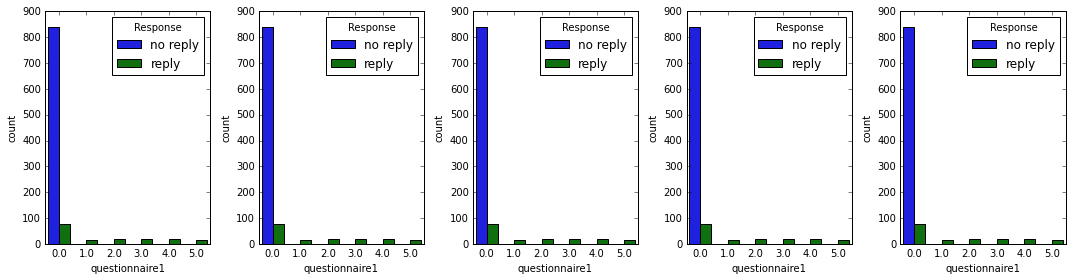

In [69]:
features = ['questionnaire1', 'questionnaire2', 'questionnaire3', 'questionnaire4', 'questionnaire5']
plt.figure(figsize=(15,4))
for i in range(0,len(features)):
  plt.subplot(1, len(features), i+1)
  sns.countplot(x = 'questionnaire1', hue = 'Response', data = df)
  plt.tight_layout()

Since questionnaire only filled with responsive customer we should drop them

In [70]:
df = df.drop(features, axis=1)

3. Check relationship of 'contraction_day' with 'contraction_day_JP' and  'Card_contraction' relationship with: 'contraction_day_JP', 'contraction_mon' and 'contraction_year'

In [71]:
pd.crosstab(df['contraction_day'] , df['contraction_day_JP'])

contraction_day_JP,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
contraction_day,,,,,,,
1.0,0,0,0,156,0,0,0
2.0,0,137,0,0,0,0,0
3.0,0,0,0,0,0,123,0
4.0,0,0,0,0,0,0,152
5.0,0,0,0,0,154,0,0
6.0,118,0,0,0,0,0,0
7.0,0,0,159,0,0,0,0


In [72]:
#Get day, month and year from Card_contraction
card_contraction_dayname = df['Card_contraction'].dt.day_name()
card_contraction_month = pd.to_datetime(df['Card_contraction']).dt.month
card_contraction_year = pd.to_datetime(df['Card_contraction']).dt.year

In [73]:
pd.crosstab(df['contraction_day_JP'], card_contraction_dayname)

Card_contraction,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
contraction_day_JP,,,,,,,
Friday,118,0,0,0,0,0,0
Monday,0,137,0,0,0,0,0
Saturday,0,0,159,0,0,0,0
Sunday,0,0,0,156,0,0,0
Thursday,0,0,0,0,154,0,0
Tuesday,0,0,0,0,0,123,0
Wednesday,0,0,0,0,0,0,152


In [74]:
pd.crosstab(df['contraction_mon'], card_contraction_month)

Card_contraction,1,2,3,4
contraction_mon,,,,
1.0,310,0,0,0
2.0,0,251,0,0
3.0,0,0,329,0
4.0,0,0,0,109


In [75]:
pd.crosstab(df['contraction_year'], card_contraction_year)

Card_contraction,2003
contraction_year,
2003.0,999


'Card_contraction' proven to be a composite variable from 'contraction_day', 'contraction_month', 'contraction_year'

In [76]:
df = df.drop(['Card_contraction', 'contraction_year', 'contraction_day_JP'], axis=1)

5. Correlation of 'No_function' with 'No_member_store_use', 'No_category_use', and 'No_records'

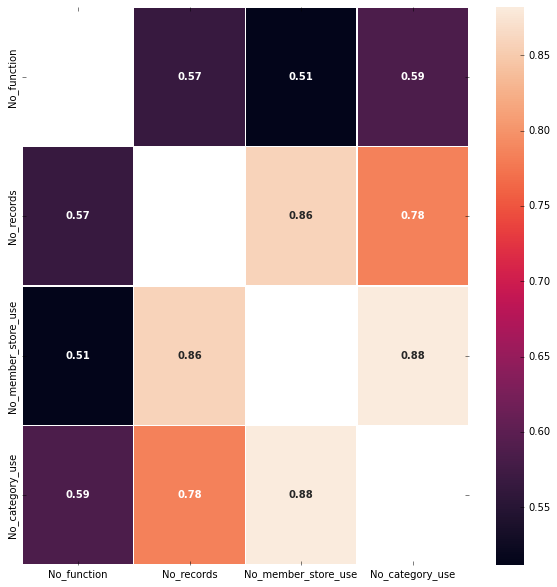

In [77]:
No_use_corr = df[['No_function', 'No_records', 'No_member_store_use', 'No_category_use']].corr()
max_column_u = np.max(No_use_corr)
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(No_use_corr, mask = No_use_corr == max_column_u, annot=True, linewidth = .5, ax=ax,
            annot_kws={"weight" : "bold"}, xticklabels="auto", yticklabels="auto")

## Relationship between continous and category variable

1. Age and Generation

In [78]:
pd.crosstab(df['Age'], df['generation'])
#Show with boxplot for a better visualization

generation,10s,20s,30s,40s,50s,60s,70s
Age,,,,,,,
14.0,9,0,0,0,0,0,0
15.0,7,0,0,0,0,0,0
16.0,12,0,0,0,0,0,0
17.0,10,0,0,0,0,0,0
18.0,10,0,0,0,0,0,0
19.0,15,0,0,0,0,0,0
20.0,0,8,0,0,0,0,0
21.0,0,17,0,0,0,0,0
22.0,0,23,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


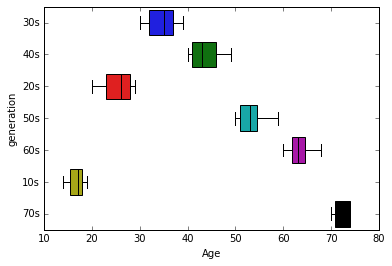

In [79]:
sns.boxplot(df['Age'], df['generation'])

Drop generation as it's only show the age in 10 years bins

In [80]:
df = df.drop(['generation'], axis=1)

# Modelling

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NO                   999 non-null    int64         
 1   Customer_ID          999 non-null    int64         
 2   Response             999 non-null    object        
 3   Sex                  999 non-null    object        
 4   Age                  999 non-null    float64       
 5   Card_type            999 non-null    object        
 6   Shopping             999 non-null    float64       
 7   Cashing              999 non-null    float64       
 8   ETC                  999 non-null    float64       
 9   Card_grade           999 non-null    object        
 10  Job                  999 non-null    object        
 11  marriage             999 non-null    object        
 12  expiration_date      999 non-null    datetime64[ns]
 13  shopping_avg         918 non-null  

In [82]:
df.isnull().sum()/len(df)*100

NO                      0.000000
Customer_ID             0.000000
Response                0.000000
Sex                     0.000000
Age                     0.000000
Card_type               0.000000
Shopping                0.000000
Cashing                 0.000000
ETC                     0.000000
Card_grade              0.000000
Job                     0.000000
marriage                0.000000
expiration_date         0.000000
shopping_avg            8.108108
cashing_avg            20.020020
shopping_rec            8.108108
cashing_rec            20.020020
No_records              0.000000
No_function             0.000000
No_member_store_use     0.000000
No_category_use         0.000000
max_charge              0.000000
min_charge              0.000000
avg_charge              0.000000
charge_avg_per_mon      0.000000
charge_lmon             0.000000
contraction_mon         0.000000
contraction_day         0.000000
length_of_use           0.000000
Response_encode         0.000000
dtype: flo

After analysis there are still 34 features with 4 features still have several missing values. We can impute them with 0 as we want to have an insight from the data as it is.

### Addressing Missing Value

In [83]:
df[['shopping_avg', 'shopping_rec', 'cashing_avg', 'cashing_rec']] = df[['shopping_avg', 'shopping_rec', 'cashing_avg', 'cashing_rec']].fillna(0)

Since the features that has missing values are average of each category or transaction method, we can impute them with median value. This is because the numerical values are right-skewed.

In [84]:
df = df.drop(['NO', 'Customer_ID'], axis=1)

In [85]:
df.head()

,Response,Sex,Age,Card_type,Shopping,Cashing,ETC,Card_grade,Job,marriage,...,No_category_use,max_charge,min_charge,avg_charge,charge_avg_per_mon,charge_lmon,contraction_mon,contraction_day,length_of_use,Response_encode
0,no reply,F,35.0,original,1.0,0.0,0.0,silver card,Unknown,married,...,4.0,72300.0,6620.0,28656.0,28656.0,8410.0,3.0,7.0,853.0,0
1,reply,M,39.0,affiliated card A,1.0,1.0,0.0,gold card,general payer,unmarried,...,6.0,48770.0,2430.0,22815.0,29660.0,13810.0,1.0,3.0,915.0,1
2,no reply,F,43.0,affiliated card A,1.0,1.0,1.0,silver card,Unknown,married,...,4.0,21680.0,6380.0,11912.0,11912.0,6380.0,2.0,1.0,792.0,0
3,no reply,F,45.0,original,1.0,1.0,1.0,silver card,Unknown,married,...,1.0,3860.0,3860.0,3860.0,3860.0,3860.0,2.0,4.0,0.0,0
4,no reply,M,33.0,affiliated card A,1.0,0.0,0.0,gold card,general payer,married,...,2.0,13200.0,5270.0,9483.0,9483.0,5270.0,1.0,1.0,792.0,0


### Encoding

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Response             999 non-null    object        
 1   Sex                  999 non-null    object        
 2   Age                  999 non-null    float64       
 3   Card_type            999 non-null    object        
 4   Shopping             999 non-null    float64       
 5   Cashing              999 non-null    float64       
 6   ETC                  999 non-null    float64       
 7   Card_grade           999 non-null    object        
 8   Job                  999 non-null    object        
 9   marriage             999 non-null    object        
 10  expiration_date      999 non-null    datetime64[ns]
 11  shopping_avg         999 non-null    float64       
 12  cashing_avg          999 non-null    float64       
 13  shopping_rec         999 non-null  

For interpretable and modeling purpose we should convert expiration_date into expiration_day and expiration_month.

In [88]:
df['expiration_day'] = df['expiration_date'].dt.dayofweek
df['expiration_month'] = pd.to_datetime(df['expiration_date']).dt.month

In [89]:
#To show us the day in case expiration_date is important
exp_day = df['expiration_date'].dt.day_name()

In [90]:
df = df.drop(['expiration_date'], axis=1)

We do One Hot Encoding for all features to simplify us with the feature importances interpretation after modeling.

In [87]:
df = df.drop(columns = 'Response_encode')

In [91]:
df =pd.get_dummies(data=df,columns=['Response', 'Sex', 'marriage', 'Card_type', 'Card_grade', 'Job'], drop_first=True)
df.head()

,Age,Shopping,Cashing,ETC,shopping_avg,cashing_avg,shopping_rec,cashing_rec,No_records,No_function,...,Card_type_original,Card_grade_platinum card,Card_grade_silver card,Job_doctor,Job_general payer,Job_lawyer,Job_other,Job_part time job,Job_sole proprietorship,Job_student
0,35.0,1.0,0.0,0.0,44610.0,23720.0,16920.0,8410.0,5.0,3.0,...,1,0,1,0,0,0,0,0,0,0
1,39.0,1.0,1.0,0.0,27272.0,23174.0,54060.0,13810.0,13.0,3.0,...,0,0,0,0,1,0,0,0,0,0
2,43.0,1.0,1.0,1.0,12510.0,11015.0,6380.0,8110.0,5.0,2.0,...,0,0,1,0,0,0,0,0,0,0
3,45.0,1.0,1.0,1.0,3860.0,0.0,3860.0,0.0,1.0,1.0,...,1,0,1,0,0,0,0,0,0,0
4,33.0,1.0,0.0,0.0,5270.0,11590.0,5270.0,13200.0,3.0,2.0,...,0,0,0,0,1,0,0,0,0,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          999 non-null    float64
 1   Shopping                     999 non-null    float64
 2   Cashing                      999 non-null    float64
 3   ETC                          999 non-null    float64
 4   shopping_avg                 999 non-null    float64
 5   cashing_avg                  999 non-null    float64
 6   shopping_rec                 999 non-null    float64
 7   cashing_rec                  999 non-null    float64
 8   No_records                   999 non-null    float64
 9   No_function                  999 non-null    float64
 10  No_member_store_use          999 non-null    float64
 11  No_category_use              999 non-null    float64
 12  max_charge                   999 non-null    float64
 13  min_charge          

### Split the features and target

In [93]:
# Percentage of target class
target = df['Response_reply'].value_counts().reset_index()
target.rename(columns={'index' : 'Response_reply', 'Response_reply':'freq'}, inplace = True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,Response_reply,freq,percentage
0,0,839,83.98
1,1,160,16.02


The dataset is very small so oversampling will introduce dependent observation for more than half of the data in minority class which won't be good for our model.

In [94]:
X = df.drop(['Response_reply'],axis=1).to_numpy()
y = df['Response_reply'].to_numpy()
y = y.reshape(len(y),)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## 1. Baseline - Dummy Classifier

In [95]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score, classification_report, plot_confusion_matrix, plot_roc_curve, precision_score
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier()
clf_dummy.fit(X_train, y_train)
y_pred = clf_dummy.predict(X_test)

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       176
           1       0.00      0.00      0.00        24

    accuracy                           0.88       200
   macro avg       0.44      0.50      0.47       200
weighted avg       0.77      0.88      0.82       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision in our model is conversion rate of DM Response, while recall is capture rate of the DM Response. We can see that the baseline model has very bad recall and precision since we didn't work out the imbalance target.

### Finding out the best method

The methods that we are going to focus on will be methods that aren't affected with multicollinearity and imbalance data, such as root-tree algorithm. This will give us better recall and precision and help us better in selecting features that are more important for our insight.

In [97]:
clf = [RandomForestClassifier(random_state=42),
      XGBClassifier(random_state = 42),
       DecisionTreeClassifier(random_state=42)]

ml_method = pd.DataFrame(columns = ['Method', 'Recall','Precision', 'F1 Score','AUC'])

In [98]:
for model in clf:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    method = str(type(model)).split('.')[-1][:-2]
    

    auc = roc_auc_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    
    
    ml_method = ml_method.append({'Method': method, 
                    'Recall': recall,
                    'Precision': precision,
                    'F1 Score': f1,
                    'AUC':auc},
                     ignore_index=True)

In [99]:
ml_method

,Method,Recall,Precision,F1 Score,AUC
0,RandomForestClassifier,0.333333,0.888889,0.484848,0.663826
1,XGBClassifier,0.500000,0.800000,0.615385,0.741477
2,DecisionTreeClassifier,0.458333,0.647059,0.536585,0.712121


Random Forest Classifier

In [100]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       176
           1       0.89      0.33      0.48        24

    accuracy                           0.92       200
   macro avg       0.90      0.66      0.72       200
weighted avg       0.91      0.92      0.90       200



XGBoost Classifier

In [101]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       176
           1       0.80      0.50      0.62        24

    accuracy                           0.93       200
   macro avg       0.87      0.74      0.79       200
weighted avg       0.92      0.93      0.92       200



Decision Tree Classifier

In [102]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       176
           1       0.65      0.46      0.54        24

    accuracy                           0.91       200
   macro avg       0.79      0.71      0.74       200
weighted avg       0.90      0.91      0.90       200



As our data still have imbalanced target the methods poorly predicted the recall and precision. We can try hyperparameter tuning for the methods and as both metrics is as important in this project than it's best to focus on XGBClassifier and DecisionTreeClassifier since Random Forest gave us a very poor score in recall.

## Hyperparameter Tuning

### Decision Tree

In [103]:
dt_clf = DecisionTreeClassifier(random_state=42)

In [104]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'], 
        'max_depth': [1, 2, 3, 4],
        'min_samples_leaf': [2, 3]
       }

dt_gridcv = GridSearchCV(dt_clf, parameters, scoring='recall')
dt_gridcv.fit(X_train,  y_train)
dt_gridcv.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2}

In [105]:
#Model Classification Report Summary

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

def model_report(model):
  
#Model Score Summary  
  y_pred = model.best_estimator_.predict(X_test)
  print('Classification Report')
  print(classification_report(y_test, y_pred))
  print("-----------------------------")
  
  print('Model AUC score: {0:0.3f}'. format(roc_auc_score(y_test, y_pred)))
  print('Model F1 score: {0:0.3f}'. format(f1_score(y_test, y_pred)))
  print('Model precision score: {0:0.3f}'. format(precision_score(y_test, y_pred)))
  print('Model recall score: {0:0.3f}'. format(recall_score(y_test, y_pred)))

  print('\n')
  print('Confusion Matrix and ROC-AUC Display')
  print("-----------------------------")
#Confusion Matrix and ROC-AUC Score for model
  fig, ax = plt.subplots(ncols=2, figsize=(10,7))
  y_pred = model.best_estimator_.predict(X_test)

  cm = confusion_matrix(y_test, y_pred, labels=model.best_estimator_.classes_)
  disp_con = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.best_estimator_.classes_)
  disp_roc = RocCurveDisplay.from_estimator(model.best_estimator_, X_test, y_test, ax = ax[1])
  disp_con.plot(ax=ax[0])

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       176
           1       0.55      0.67      0.60        24

    accuracy                           0.90       200
   macro avg       0.75      0.80      0.77       200
weighted avg       0.91      0.90      0.90       200

-----------------------------
Model AUC score: 0.796
Model F1 score: 0.604
Model precision score: 0.552
Model recall score: 0.667


Confusion Matrix and ROC-AUC Display
-----------------------------


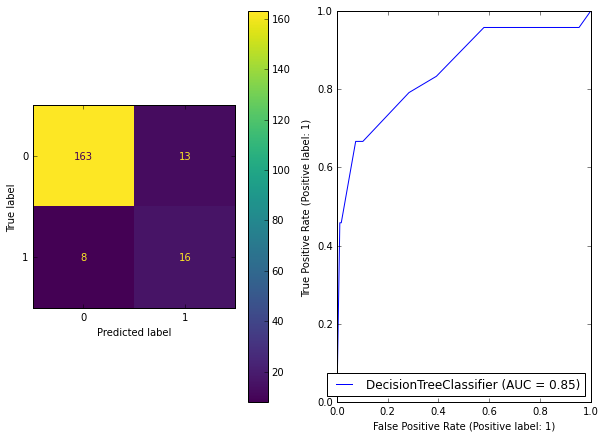

In [106]:
model_report(dt_gridcv)

In [ ]:
dt_clf = dt_gridcv.best_estimator_
dt_clf.fit(X,y)
plt.figure(figsize = (20,16))
tree.plot_tree(dt_clf)

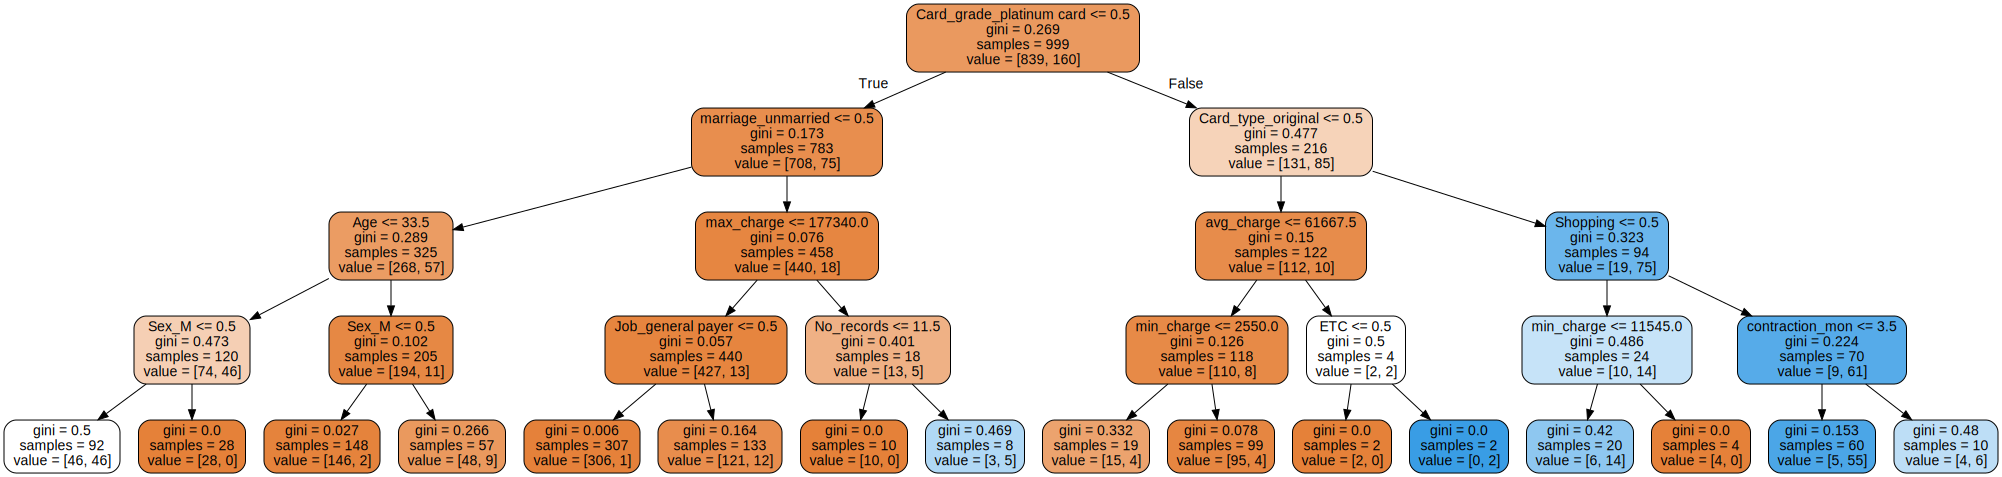

In [108]:
dot_data = tree.export_graphviz(dt_clf, feature_names=df.drop(columns = 'Response_reply').columns, filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph

Decision Tree Classifier had a slightly better F1-Score and AUC after hyperparameter tuning. However, we see a drawback in precision indicating that the improvement in recall is a scarifice from precision. We can also see from the Decision Tree visualization that overall the nodes can separate each class pretty well, but several nodes that still has poor gini score.

### XGBoost Classifier

In [109]:
xgb_clf = XGBClassifier(random_state =42)

Since XGBClassifier has a heavy computational algorithm, we can use RandomizedCV.

In [110]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'max_depth': range(1, 7, 1),
    'n_estimators': (50, 100, 200),
    'learning_rate': [0.001, 0.01, 0.05],
    'reg_lambda' : [1,2],
    'subsample' : [0.6, 0.8]
       }

xgb_gridcv = RandomizedSearchCV(xgb_clf, parameters, cv=5, scoring='recall', n_iter=5)

xgb_gridcv.fit(X_train,  y_train)
xgb_gridcv.best_params_

{'subsample': 0.6,
 'reg_lambda': 1,
 'n_estimators': 50,
 'max_depth': 6,
 'learning_rate': 0.01}

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       176
           1       0.76      0.54      0.63        24

    accuracy                           0.93       200
   macro avg       0.85      0.76      0.80       200
weighted avg       0.92      0.93      0.92       200

-----------------------------
Model AUC score: 0.759
Model F1 score: 0.634
Model precision score: 0.765
Model recall score: 0.542


Confusion Matrix and ROC-AUC Display
-----------------------------


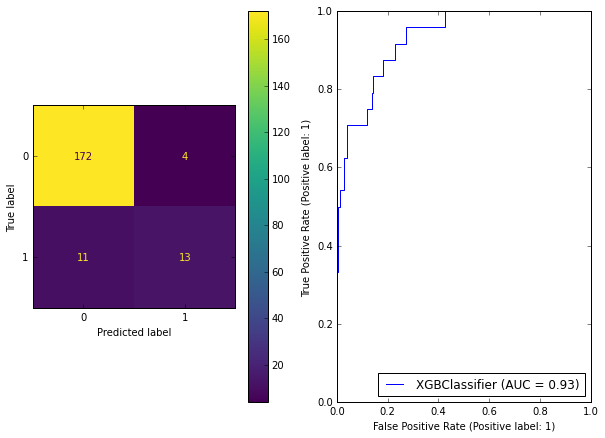

In [111]:
model_report(xgb_gridcv)

While XGBoostClassifier performance score doesn't show much difference after hyperparamter tuning. However, comparing all the metrics we can see that XGBoost Classifier is a better model for this dataset.

<function matplotlib.pyplot.show(*args, **kw)>

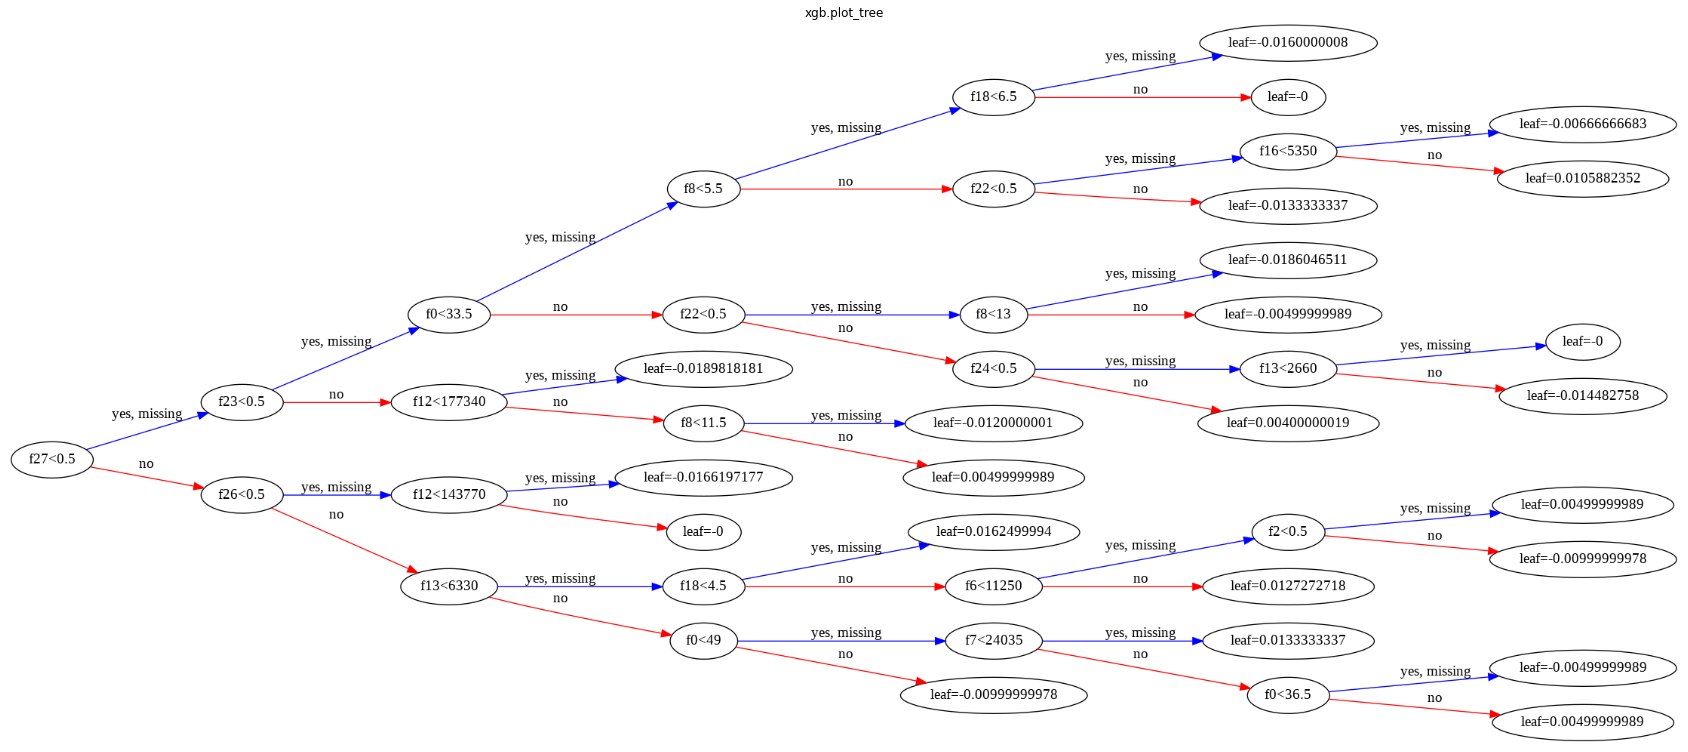

In [112]:
import xgboost
xgb_clf = xgb_gridcv.best_estimator_
xgb_clf.fit(X,y)

ax = xgboost.plot_tree(xgb_clf, num_trees = 0, rankdir = 'LR')
ax.figure.set_size_inches(30,30)
plt.title("xgb.plot_tree")
plt.show

Feature Importance

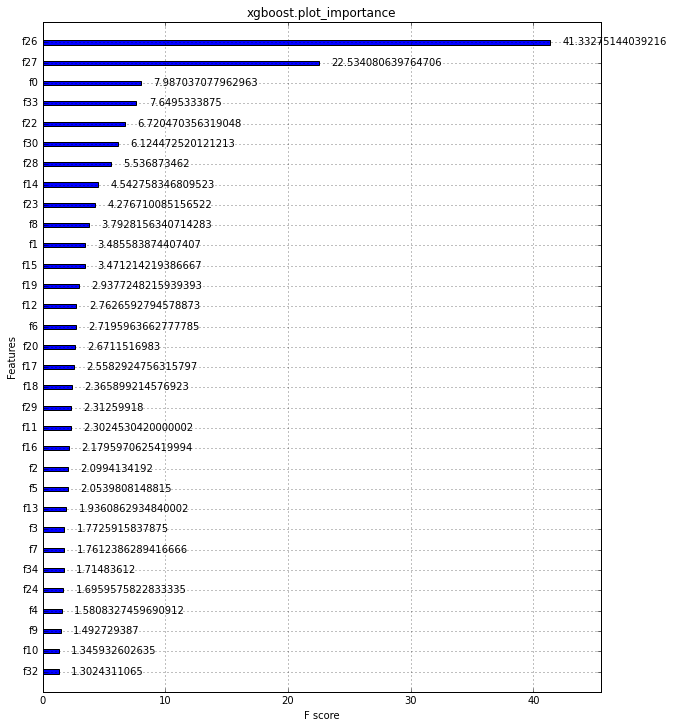

In [113]:
ax = xgboost.plot_importance(xgb_clf, importance_type = 'gain')
fig = ax.figure.set_size_inches(10,12)
plt.title("xgboost.plot_importance")
plt.show()

In [114]:
def xgb_importances(model, im_type):
  ax = xgboost.plot_importance(model, importance_type = im_type)

  feats = df.drop(columns = 'Response_reply').columns
  dict_feats = dict(enumerate(feats))

  list_ylabel = list(ax.get_yticklabels())
  list_ylabel = [ list_ylabel[i].get_text().lstrip('f') for i in range (len(list_ylabel))]
  list_ylabel = [ dict_feats[int(i)] for i in list_ylabel]

  ax.set_yticklabels(list_ylabel)
  fig = ax.figure.set_size_inches(10,12)
  plt.title("xgboost.plot_importance")
  plt.show()

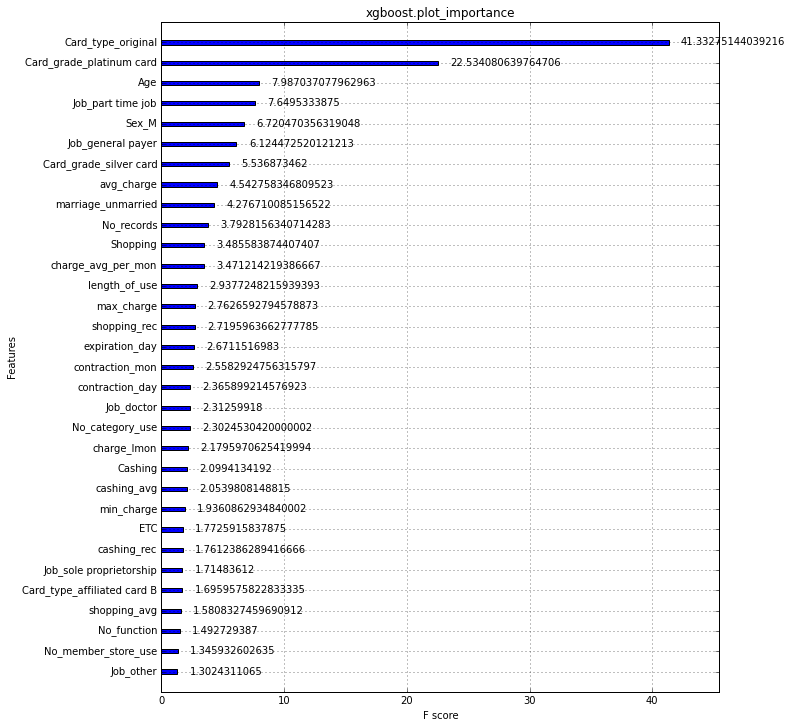

In [115]:
xgb_importances(xgb_clf, 'gain')